# AoU FHIR & OMOP Analysis
Information about Sync for Science and OMOP patients, and comparing the data of each.

First, define the locations of the data we wish to analyze and compare, and import the necessary modules.

In [1]:
import os
import pandas as pd
import omop_analyze
import fhir_analyze
import aou_analysis

current_directory = os.getcwd()
omop_directory = "\\omop\\20190823"
fhir_directory = "\\fhir\\Participant"

## FHIR Summary
pull in fhir data, let's find some basic data on the number of patients and number of entries retrived

In [2]:
fhir_patients = fhir_analyze.traverse_directory(current_directory+fhir_directory)

got 83 s4s participants


In [3]:
aou_analysis.fhir_plot_category_counts(fhir_patients)

## Common FHIR Values
Most common systems and codings 

In [4]:
aou_analysis.configure_tables()
fhir_systems = aou_analysis.code_system_counts(fhir_patients)
for category, counter in fhir_systems.items():
    df = pd.DataFrame(counter.most_common())
    df.index.name = category
    display(df)

""
PATIENT_DEMOGRAPHICS


,0,1
SMOKING_STATUS,,
0,http://loinc.org,591
1,http://snomed.info/sct,427


,0,1
PROBLEMS,,
0,http://snomed.info/sct,3875
1,http://hl7.org/fhir/sid/icd-9-cm,1537
2,urn:oid:2.16.840.1.113883.6.90,1154
3,http://hl7.org/fhir/sid/icd-9-cm/diagnosis,990
4,http://hl7.org/fhir/sid/icd-10-cm,810


,0,1
MEDICATION_ORDER,,
0,http://www.nlm.nih.gov/research/umls/rxnorm,5031
1,None,36
2,http://hl7.org/fhir/sid/ndc,5


,0,1
MEDICATION_STATEMENT,,
0,http://www.nlm.nih.gov/research/umls/rxnorm,7737
1,https://apis.followmyhealth.com/fhir/id/translation,23


,0,1
ALLERGY_INTOLERANCE,,
0,http://www.nlm.nih.gov/research/umls/rxnorm,431
1,http://fdasis.nlm.nih.gov,202
2,http://hl7.org/fhir/ndfrt,162
3,http://snomed.info/sct,134
4,http://hl7.org/fhir/sid/ndc,25
5,None,25


,0,1
LAB,,
0,http://loinc.org,26149


,0,1
VITAL,,
0,http://loinc.org,57167
1,http://snomed.info/sct,1597


,0,1
PROCEDURE,,
0,http://www.ama-assn.org/go/cpt,268
1,urn:oid:1.2.840.114350.1.13.202.2.7.2.696580,122
2,http://snomed.info/sct,119
3,urn:oid:1.2.840.114350.1.13.362.2.7.2.696580,36
4,urn:oid:1.2.840.114350.1.13.324.2.7.2.696580,28
5,urn:oid:2.16.840.1.113883.6.14,17
6,urn:oid:1.2.840.114350.1.13.71.2.7.2.696580,8
7,None,6


,0,1
IMMUNIZATION,,
0,http://hl7.org/fhir/sid/cvx,1773
1,http://hl7.org/fhir/sid/ndc,272
2,http://www.ama-assn.org/go/cpt,110


,0,1
DOCUMENT,,
0,http://loinc.org,531


In [10]:
fhir_codings = aou_analysis.coding_counts(fhir_patients)
for category, table in fhir_codings.items():
    df = pd.DataFrame(table)
    df.index.name = category
    print(df.columns)
    df = df[['system', 'code', 'display', 'count']]
    display(df)

Index([], dtype='object')


KeyError: "None of [Index(['system', 'code', 'display', 'count'], dtype='object')] are in the [columns]"

# OMOP Summary
number of patients and records retrieved from OMOP CSVs

In [6]:
omop_patients, csvs = omop_analyze.parse_omop(path=current_directory+omop_directory)

Got 74 omop participants


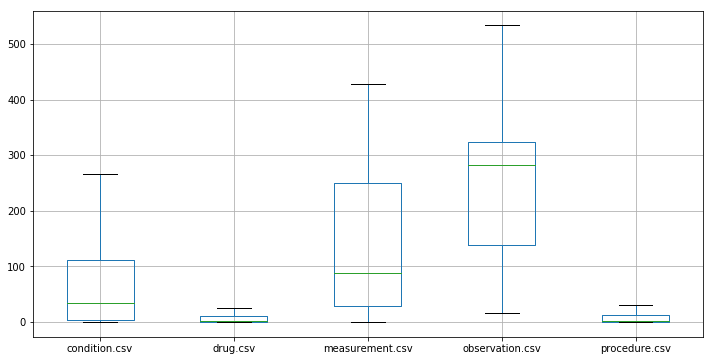

In [7]:
aou_analysis.omop_plot_category_counts(omop_patients, csvs)

In [8]:
pd.DataFrame(aou_analysis.omop_system_counts(omop_patients), index=[0])

,SNOMED,RxNorm,LOINC,PPI,None,CPT4,ICD9Proc
0,11506,2930,15001,12567,3555,569,49


# Comparison of OMOP and FHIR data
based on the 